In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from tqdm import tqdm

In [14]:
#DFT
def DFT(x):
    N = len(x)
    Wn = np.exp(-2J*np.pi/N)
    l_w = Wn**np.arange(N)
    D = (l_w.reshape(-1,1))**np.arange(N)
    return D.dot(x)

#IDFT
def IDFT(x):
    N = len(x)
    Wn = np.exp(-2J*np.pi/N)
    l_w = Wn**np.arange(0, -N, -1)
    D = (l_w.reshape(-1,1))**np.arange(N)/N
    return D.dot(x)

In [15]:
#DCT
def DCT(x):
    N = len(x)
    M = np.arange(1,2*N,2)
    M = (M.reshape(-1,1))*np.arange(N)
    M = np.cos((np.pi/(2*N))*M)
    return (x.reshape(1,-1).dot(2*M)).T

#IDCT
def IDCT(x):
    N = len(x)
    M = np.arange(1,2*N,2)
    M = (M.reshape(-1,1))*np.arange(N)
    M = np.cos((np.pi/(2*N))*M)
    alpha = np.ones([N,N])
    alpha[:,0] = [0.5]*N
    M = (M*alpha)/N
    return M.dot(x.reshape(-1,1))

In [16]:
#HAAR
def wierd_mul(a,b):
    t = []
    for i in a:
        l = [j*b for j in i]
        t.append(np.hstack(l))
    return np.vstack(t)

def H_haar(n):
    h = [np.identity(1)]
    for i in range(n):
        #temp1 = np.hstack([h[-1],h[-1]])
        temp1 = wierd_mul(h[-1],np.array([1,1]))
        #print(temp1.shape)
        #temp2 = (2**(i/2))*np.asarray([[0]*2 if k!=j else [1,-1] for j in range(2**i) for k in range(2**i)]).reshape(2**i,2**(i+1))
        temp2 = (2**(i/2))*wierd_mul(np.identity(2**i), np.array([1,-1]))
        #print(temp2.shape)
        h.append(np.vstack([temp1,temp2]))
    return h[-1]


In [17]:
#HAAR
def Haar(x):
    N = len(x)
    n = int(np.log2(N))
    H = H_haar(n)
    return H.dot(x.reshape(-1,1))
    #return np.matmul(H,x.reshape(-1,1))

#IHAAR
def IHaar(x):
    N = len(x)
    n = int(np.log2(N))
    H = H_haar(n)
    return H.T.dot(x.reshape(-1,1))/N
    #return np.matmul(H.T,x.reshape(-1,1))/N


In [18]:
#X_DFT
def X_DFT(x, L):
    N = len(x)
    X = DFT(x).reshape(-1,1)
    return np.asarray([0 if k in range(int(np.ceil((N+1-L)/2)), (N-1+L)//2+1) else X[k] for k in range(N)]).reshape(-1,1)

#X_DCT
def X_DCT(x, L):
    N = len(x)
    X = DCT(x).reshape(-1,1)
    return np.asarray([0 if k>=N-L else X[k] for k in range(N)]).reshape(-1,1)

#X_HAAR
def X_Haar(x, L):
    N = len(x)
    X = Haar(x).reshape(-1,1)
    return np.asarray([0 if k>=N-L else X[k] for k in range(N)]).reshape(-1,1)

In [19]:
#e_DFT
def e_DFT(x,l):
    X = X_DFT(x, l)
    x_e = IDFT(X)
    #print(x.shape)
    mse = np.mean(abs(x.reshape(-1,1) - x_e.reshape(-1,1))**2)
    return mse

#e_DCT
def e_DCT(x,l):
    X = X_DCT(x, l)
    x_e = IDCT(X)
    mse = np.mean((x.reshape(-1,1) - x_e.reshape(-1,1))**2)
    return mse

#e_HAAR
def e_Haar(x,l):
    X = X_Haar(x, l)
    x_e = IHaar(X)
    #print(x.shape)
    mse = np.mean((x.reshape(-1,1) - x_e.reshape(-1,1))**2)
    return mse

In [21]:
#error_transform
def error_transfrom(l_range, N = 64, x_max = 10, iterat = 20, scale = 10):
    #x = np.random.randint(x_max,size = N)
    er_dft = [np.mean([e_DFT(np.random.randint(x_max,size = N), l)*scale for j in range(iterat)]) for l in (l_range)]
    er_dct = [np.mean([e_DCT(np.random.randint(x_max,size = N), l)*scale for j in range(iterat)]) for l in (l_range)]
    er_haar = [np.mean([e_Haar(np.random.randint(x_max,size = N), l)*scale for j in range(iterat)]) for l in (l_range)]
    plt.plot(l_range, er_dft, 'blue')
    plt.plot(l_range, er_dct, 'green')
    plt.plot(l_range, er_haar, 'brown')
    plt.legend(['DFT', 'DCT', 'Haar'])

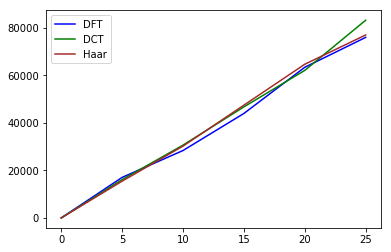

In [22]:
error_transfrom(range(0,30,5), x_max = 5, iterat = 50, scale = 100000)